In [166]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [18]:
df = pd.read_csv("Data_Train.csv")

In [19]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai eta 1.6 Di SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null float64
Engine               5983 non-null float64
Power                5876 non-null float64
Seats                5977 non-null float64
New_Price            824 non-null float64
Price                6019 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [21]:
df.fillna(0,inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.00,1.75
1,Hyundai eta 1.6 Di SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,0.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,0.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,0.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 Di S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,0.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,0.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,0.00,2.65


In [22]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.00,1.75
1,Hyundai eta 1.6 Di SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,0.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,0.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,0.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 Di S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,0.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,0.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,0.00,2.65


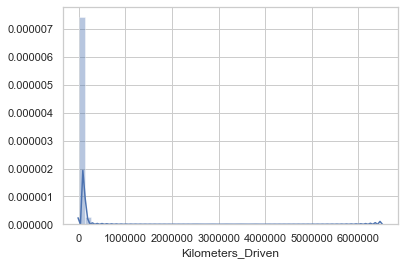

In [23]:
sns.set_style('whitegrid')
sns.distplot(df['Kilometers_Driven'])

In [24]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [25]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [27]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [28]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai eta 1.6 Di SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [33]:
le =LabelEncoder()
dfle = df

In [35]:
dfle.Owner_Type = le.fit_transform(dfle.Owner_Type)

In [75]:
dfle.Transmission=le.fit_transform(dfle.Transmission)
dfle.Fuel_Type=le.fit_transform(dfle.Fuel_Type)
dfle.Location=le.fit_transform(dfle.Location)
dfle.Year=le.fit_transform(dfle.Year)
dfle

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,9,12,72000,0,1,0,26.60,998.0,58.16,5.0,0.00,1.75
1,Hyundai eta 1.6 Di SX Option,10,17,41000,1,1,0,19.67,1582.0,126.20,5.0,0.00,12.50
2,Honda Jazz V,2,13,46000,4,1,0,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,2,14,87000,1,1,0,20.77,1248.0,88.76,7.0,0.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,15,40670,1,0,2,15.20,1968.0,140.80,5.0,0.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,4,16,27365,1,1,0,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 Di S,6,17,100000,1,1,0,24.40,1120.0,71.00,5.0,0.00,4.00
6016,Mahindra Xylo D4 BSIV,6,14,55000,1,1,2,14.00,2498.0,112.00,8.0,0.00,2.90
6017,Maruti Wagon R VXI,8,15,46000,4,1,0,18.90,998.0,67.10,5.0,0.00,2.65


In [76]:
x = dfle[["Owner_Type","Fuel_Type","Location","Year","Kilometers_Driven","Mileage","Engine","Power","Seats","New_Price"]].values
y = dfle.Price.values

In [77]:
ohe = OneHotEncoder(categorical_features=[0,1,2,3])
ohe.fit_transform(x).toarray()
x

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[  0.  ,   0.  ,   9.  , ...,  58.16,   5.  ,   0.  ],
       [  0.  ,   1.  ,  10.  , ..., 126.2 ,   5.  ,   0.  ],
       [  0.  ,   4.  ,   2.  , ...,  88.7 ,   5.  ,   8.61],
       ...,
       [  2.  ,   1.  ,   6.  , ..., 112.  ,   8.  ,   0.  ],
       [  0.  ,   4.  ,   8.  , ...,  67.1 ,   5.  ,   0.  ],
       [  0.  ,   1.  ,   5.  , ...,  57.6 ,   5.  ,   0.  ]])

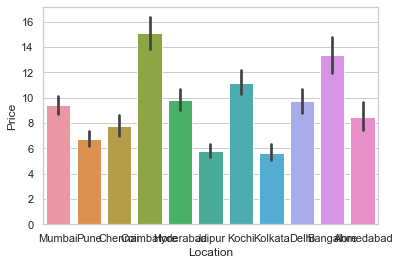

In [13]:
sns.barplot(df['Location'],df['Price'])

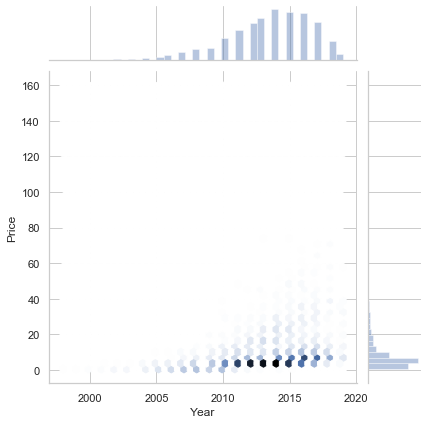

In [14]:
sns.jointplot(df['Year'],df['Price'],kind='hex')

In [78]:
X = x[:,1:]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=226)

In [125]:
Le =LinearRegression()
Le.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
Le.score(X_test,y_test)

0.710802662588315

In [128]:
from sklearn.linear_model import Ridge , Lasso

In [174]:
rd = Ridge()
rd.fit(X_train,y_train)
rd =rd.score(X_train,y_train)


In [176]:
rd2 = Ridge(alpha = 0.001)
rd2.fit(X_train,y_train)
rd2.score(X_test,y_test)


0.7108026608861095

In [178]:
ls = Lasso()
ls.fit(X_train,y_train)
ls.score(X_test,y_test)


0.6887094911442354

In [179]:
ls1 = Lasso(alpha =0.002)
ls1.fit(X_train,y_train)
ls1.score(X_test,y_test)


0.7108020328342617